In [37]:
from pathlib import Path
ADDITIONAL_DATA_SOURCE = Path.cwd().parent / 'data' / 'additional_data' 
ADDITIONAL_DATA_FILE_SOURCE = Path.cwd().parent / 'data' / 'additional_data' / 'measurement_details.txt'
ADDITIONAL_DATA_FILE_JSON = Path.cwd().parent / 'data' / 'additional_data' / 'measurement_details.json'

In [38]:
def collect_measurement_properties(items_to_search="Core information", 
                                   separator = 'measurement details', #
                                   print_material_information = False):
    with open(ADDITIONAL_DATA_FILE_SOURCE, 'r') as fp:
        

        measurement_properties = {}

        # read all lines in a list
        lines = fp.readlines()
        material_name = ""
        manufacturer_name = ""
        for index, line in enumerate(lines):
             
            # check if separator is in line
            if line.find(separator) != -1:
                material_name = line.split(':')[0].split(' - ')[1].split(' ')[0]
                manufacturer_name = line.split(':')[0].split(' - ')[0].replace(" ","")
                starting_line_index = lines.index(line)
                               
                measurement_properties[f"{material_name}"] = {"Manufacturer": manufacturer_name}

                if print_material_information:

                    print(f"{starting_line_index = }\n"
                          f"{manufacturer_name = }\n"
                          f"{material_name = }\n")
                    
            if line.find(items_to_search) != -1:
                line_list = lines[index + 2].split(' --- ')
                measurement_properties[material_name]["toroid"] = line_list[1]
                measurement_properties[material_name]["effective cross section"] = line_list[2].split(" ")[1]
                measurement_properties[material_name]["effective volume"] = line_list[3].split(" ")[1]
                measurement_properties[material_name]["effective length"] = line_list[4].split(" ")[1]
                measurement_properties[material_name]["N1"] = line_list[5].split(" ")[1]
                measurement_properties[material_name]["N2"] = line_list[6].split(" ")[1]
                
    return measurement_properties

In [39]:
import json
print(json.dumps(collect_measurement_properties(), indent=2))


{
  "3C90": {
    "Manufacturer": "Ferroxcube",
    "toroid": "TX-25-15-10",
    "effective cross section": "4.89e-05",
    "effective volume": "2.9428e-06",
    "effective length": "0.06018",
    "N1": "1",
    "N2": "7"
  },
  "3C94": {
    "Manufacturer": "Ferroxcube",
    "toroid": "TX-20-10-7",
    "effective cross section": "3.36e-05",
    "effective volume": "1.465e-06",
    "effective length": "0.0436",
    "N1": "1",
    "N2": "7"
  },
  "3E6": {
    "Manufacturer": "Ferroxcube",
    "toroid": "TX-22-14-6.4",
    "effective cross section": "2.48e-05",
    "effective volume": "1.34e-06",
    "effective length": "0.0542",
    "N1": "1",
    "N2": "4"
  },
  "3F4": {
    "Manufacturer": "Ferroxcube",
    "toroid": "E-32-6-20-R",
    "effective cross section": "0.00013",
    "effective volume": "4.56e-06",
    "effective length": "0.0351",
    "N1": "1",
    "N2": "5"
  },
  "77": {
    "Manufacturer": "Fair-Rite",
    "toroid": "0014",
    "effective cross section": "4e-05",
    

In [69]:
# store the data as json
out_file = open(ADDITIONAL_DATA_FILE_JSON, "w")
  
json.dump(collect_measurement_properties(), out_file, indent = 6)
  
out_file.close()

# Effective Toroid Dimensions

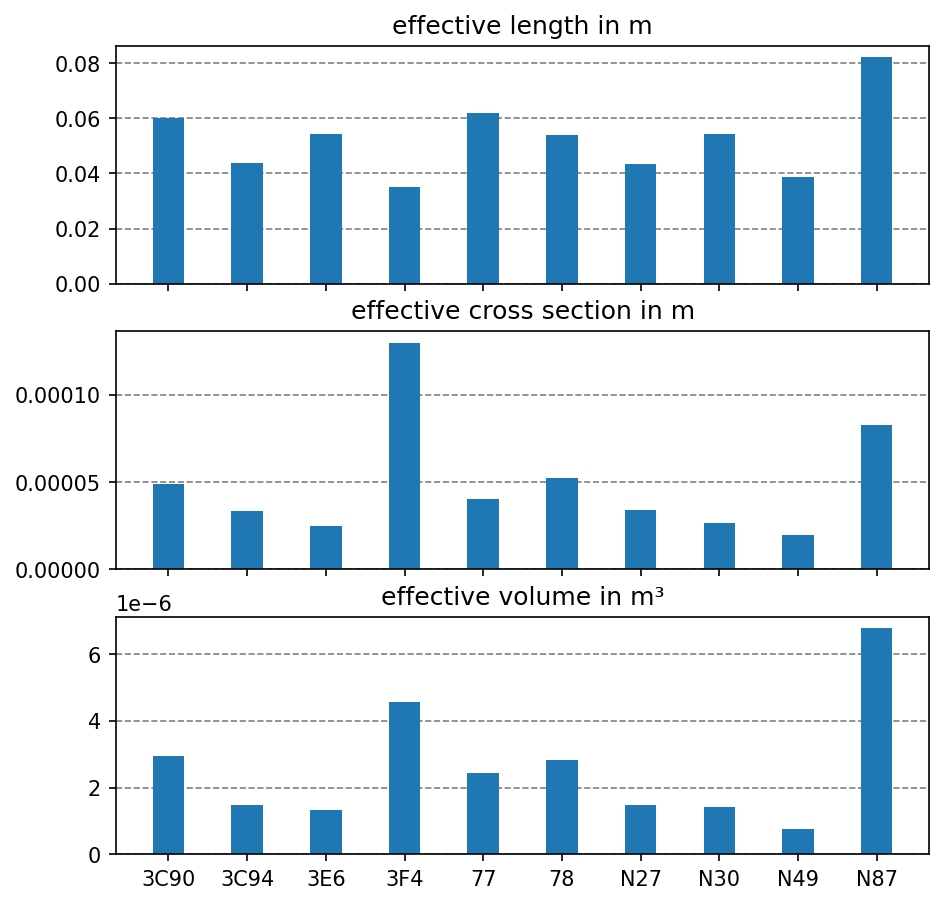

In [75]:
import numpy as np
from matplotlib import pyplot as plt

# load the data from stored json
file = open(ADDITIONAL_DATA_FILE_JSON, "r")
data = json.load(file)

# predefine figure according to no of params to be loaded
properties_to_plot = ["effective length", "effective cross section", "effective volume"]
units_to_plot = ["m", "m", "m³"]
fig, axes = plt.subplots(nrows=len(properties_to_plot), ncols=1, dpi=150, sharex=True, sharey=False, figsize=(7, 7))
bar_width = 0.4

for ax_num, property_to_plot in enumerate(properties_to_plot):
    loaded_properties = []
    material_names = []
    for material_name, material_properties in data.items():
        material_names.append(material_name)
        loaded_properties.append(float(material_properties[property_to_plot]))
        #loaded_properties.append(float(material_properties[]))
    axes[ax_num].bar(material_names, loaded_properties, bar_width)
    axes[ax_num].yaxis.grid(color='gray', linestyle='dashed')
    axes[ax_num].set_axisbelow(True)
    axes[ax_num].set_title(f"{property_to_plot} in {units_to_plot[ax_num]}")
    
    

plt.show()          

# Close json
file.close()